# Section-1.0 Importing data

## 1.1 Importing libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(style="white", palette="muted", color_codes=True)

# Mlflow Tracking

In [25]:
# mlflow server --backend-store-uri mlruns/ --default-artifact-root mlruns/ --host 0.0.0.0 --port 5000
remote_server_uri = "http://127.0.0.1:5000" # set to your server URI
mlflow.set_tracking_uri(remote_server_uri)  # or set the MLFLOW_TRACKING_URI in the env

In [26]:
mlflow.tracking.get_tracking_uri()

'http://127.0.0.1:5000'

In [27]:
exp_name = "omdena1"
mlflow.set_experiment(exp_name)

## 1.2 Loading data

In [28]:
data_path = "E:/DataScience_Ai/hobby_projects/Omdena-challenge/Dryad/DNN_Syed_Arsalan_Amin/released_datasets/v1/A/data/train_set.csv"

In [29]:
df = pd.read_csv(data_path)

In [30]:
old_new_columns_dict = dict(zip(df.columns.to_list(), [i.replace('-','_') for i in df.columns]))
df = df.rename(columns=old_new_columns_dict)

In [31]:
df.head(2)

,sensor_node_id,scan_time,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,...,start_time,end_time,burn_material,burn_material_amount(g),hotplate_start,hotplate_temp,distance_sensor_hotplate,venue,venue_type,encoded_specimen
0,146,2021-09-01 09:01:36.817528009,18.8,19.0,19.6,19.6,19.7,20.0,20.1,20.1,...,2021-09-01 08:30:22.000000000,2021-09-01 18:50:46.000000000,SP2,600.0,2021-09-01 10:03:57.000000000,500,30m,hall,Hall,0
1,146,2021-09-01 09:02:13.375891000,19.2,19.3,19.8,19.8,19.9,20.2,20.2,20.2,...,2021-09-01 08:30:22.000000000,2021-09-01 18:50:46.000000000,SP2,600.0,2021-09-01 10:03:57.000000000,500,30m,hall,Hall,0


# Exploring data

## Categorical columns

In [32]:
df.columns

Index(['sensor_node_id', 'scan_time', 'temp_0', 'temp_1', 'temp_2', 'temp_3',
       'temp_4', 'temp_5', 'temp_6', 'temp_7', 'temp_8', 'temp_9', 'humid_0',
       'humid_1', 'humid_2', 'humid_3', 'humid_4', 'humid_5', 'humid_6',
       'humid_7', 'humid_8', 'humid_9', 'gas_scan_0', 'gas_scan_1',
       'gas_scan_2', 'gas_scan_3', 'gas_scan_4', 'gas_scan_5', 'gas_scan_6',
       'gas_scan_7', 'gas_scan_8', 'gas_scan_9', 'gas_scan_cnt', 'trigger',
       'experiment_id', 'start_time', 'end_time', 'burn_material',
       'burn_material_amount(g)', 'hotplate_start', 'hotplate_temp',
       'distance_sensor_hotplate', 'venue', 'venue_type', 'encoded_specimen'],
      dtype='object')

In [33]:
drop_cols = ['scan_time', 'start_time', 'end_time', 'venue_type','hotplate_start', 'hotplate_temp', 'distance_sensor_hotplate', 'burn_material', 'venue', 'trigger']
  
df = df.drop(drop_cols, axis = 1) # axis =1 means drop the columns

In [ ]:
# print(df['distance_sensor_hotplate'].unique())
# print(df['burn_material'].unique())
# print(df['venue'].unique())
# print(df['trigger'].unique())
# print(df['encoded_specimen'].unique()) # in_smoke and clean_air

# Encoding

In [ ]:
# dist_encoder = LabelEncoder()
# burn_encoder = LabelEncoder()
# venue_encoder = LabelEncoder()
# trigger_encoder = LabelEncoder()


# df['distance_sensor_hotplate'] = dist_encoder.fit_transform(df['distance_sensor_hotplate'])
# df['burn_material'] = burn_encoder.fit_transform(df['burn_material'])
# df['venue'] = venue_encoder.fit_transform(df['venue'])
# df['trigger'] = trigger_encoder.fit_transform(df['trigger'])


In [35]:
print(df.shape)
df.head(2)

(2008, 35)


,sensor_node_id,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,...,gas_scan_4,gas_scan_5,gas_scan_6,gas_scan_7,gas_scan_8,gas_scan_9,gas_scan_cnt,experiment_id,burn_material_amount(g),encoded_specimen
0,146,18.8,19.0,19.6,19.6,19.7,20.0,20.1,20.1,20.3,...,855800.0,692100.0,613100.0,150400.0,300900.0,364900.0,1.0,6,600.0,0
1,146,19.2,19.3,19.8,19.8,19.9,20.2,20.2,20.2,20.4,...,1375800.0,1115100.0,971500.0,216100.0,358000.0,416900.0,2.0,6,600.0,0


# 2.0 Exploring and Data Preprocessing

## 2.1 Checking missing values in the data

<AxesSubplot:>

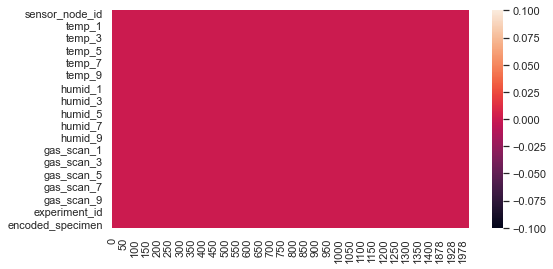

In [59]:
plt.figure(figsize=(8,4)) # seems like our data have some missing values !
sns.heatmap(df.isna().transpose())

## 2.2 Getting the details of entire dataset

<AxesSubplot:>

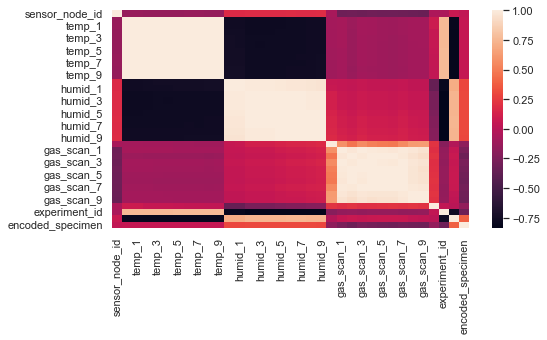

In [38]:
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr())

## 2.3 Let's see the correlations between the columns


<AxesSubplot:>

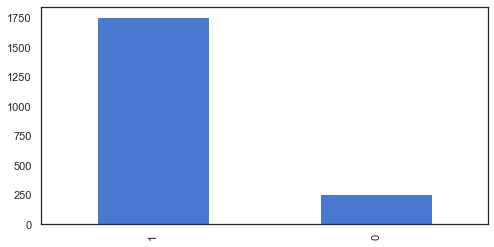

In [49]:
df['encoded_specimen'].value_counts().plot(figsize=(8,4), kind='bar')

In [40]:
X = df.drop("encoded_specimen", axis=1)

# encode specimen_class values as integers
Y = df['encoded_specimen']

In [57]:
df = df.dropna()

In [58]:
df.isna().sum().sum()

0

In [41]:
print(X.shape)
print(Y.shape)

(2008, 34)
(2008,)


In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [45]:
x_train

array([[0.25      , 0.33333333, 0.33333333, ..., 0.28571429, 0.        ,
        1.        ],
       [0.25      , 0.43333333, 0.42222222, ..., 0.07142857, 0.375     ,
               nan],
       [0.625     , 0.44444444, 0.44444444, ..., 0.35714286, 0.375     ,
               nan],
       ...,
       [0.375     , 0.27777778, 0.26666667, ..., 0.        , 0.25      ,
        1.        ],
       [0.4375    , 0.41111111, 0.41111111, ..., 0.21428571, 0.375     ,
               nan],
       [0.25      , 0.33333333, 0.32222222, ..., 0.        , 0.25      ,
        1.        ]])

In [46]:
y_train

611     1
1726    1
1598    1
1878    0
1625    1
       ..
1831    1
114     1
1278    1
1632    1
1314    1
Name: encoded_specimen, Length: 1405, dtype: int64

In [ ]:
# n_features = x_train.shape[1]

# model = Sequential()
# model.add(Dense(16, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=1)

In [ ]:
# print(history.history.keys(), '\n')
# history.history['accuracy']

In [ ]:
def evaluate_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2
    

In [ ]:
# def train(epochs = 1, batch_size = 1):
n_features = x_train.shape[1]

epochs = 2
batch_size = 2

with mlflow.start_run():

    model = Sequential()
    model.add(Dense(16, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

    # model.predict(x_test)
    pred = model.predict(x_test)

    (mae, r2)= evaluate_metrics(y_test, pred)

    print(f'mae {mae}')
    print(f'r2 {r2}')

    mlflow.log_param(key='batch_size', value=batch_size)
    mlflow.log_param(key='epochs', value=epochs)

    # mlflow.log_metric(key="accuracy", value="history.history['accuracy']")
    # mlflow.log_metrics({'rmse':rmse, 'mae':mae, 'r2':r2})

    mlflow.log_artifact(data_path)

    print(f"Save to: {mlflow.get_artifact_uri()}")

    # mlflow.keras.log_model(model, "model")
        # return mae, r2

In [ ]:
model.predict(x_train)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
pred = model.predict(x_test)

In [ ]:
y_test

In [ ]:
confusion_matrix(y_test, pred)